## 实验四 第4.2题

In [3]:
# 导入库
# import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, \
    f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
# 数据处理,sep表示用逗号","分割数据
data  = pd.read_csv('data/Electrical Grid Data.csv',sep=',')
print(data)

NameError: name 'pd' is not defined

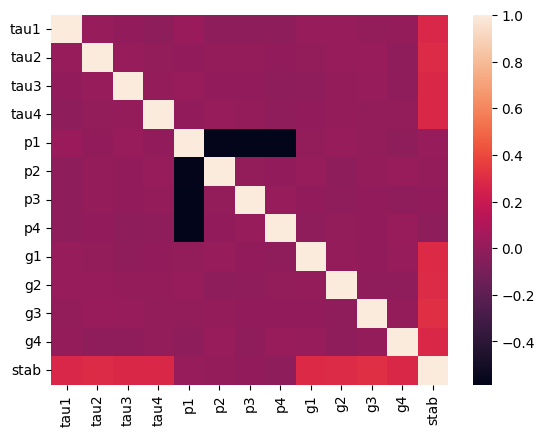

In [3]:
# 查看各列相关性,p1 = abs(p2 + p3 + p4),p1和p2、p3和p4为负相关
corr = data.corr()
corr.head()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.savefig("Correlation")
plt.show()

In [4]:
# 获取data的列名['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf']
name_list = data.columns.values.tolist()
print(name_list)

['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf']


In [5]:
# 获取预测属性
X = data.drop(['p1','stab','stabf'],axis=1)
print(X.head().T)

             0         1         2         3         4
tau1  2.959060  9.304097  8.971707  0.716415  3.134112
tau2  3.079885  4.902524  8.848428  7.669600  7.608772
tau3  8.381025  3.047541  3.046479  4.486641  4.943759
tau4  9.780754  1.369357  1.214518  2.340563  9.857573
p2   -0.782604 -1.940058 -1.207456 -1.027473 -1.125531
p3   -1.257395 -1.872742 -1.277210 -1.938944 -1.845975
p4   -1.723086 -1.255012 -0.920492 -0.997374 -0.554305
g1    0.650456  0.413441  0.163041  0.446209  0.797110
g2    0.859578  0.862414  0.766689  0.976744  0.455450
g3    0.887445  0.562139  0.839444  0.929381  0.656947
g4    0.958034  0.781760  0.109853  0.362718  0.820923


In [6]:
# 类别标签
# 获取类别标签。此处填入你的代码。（1）
# Importing required libraries
y = data['stabf']
print(y)

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object


In [7]:
# 将标签字符转换成数字
# 获取一个LabelEncoder
enc = preprocessing.LabelEncoder()
# 训练LabelEncoder,'unstable'对应1, 'stable'对应0
enc=enc.fit(['unstable', 'stable'])
# 使用训练好的LabelEncoder对原数据进行编码
y = enc.transform(y)

In [8]:
# 划分训练集和训练集。test_size=0.25。此处填入你的代码。（2）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 11) (2500, 11) (7500,) (2500,)


In [9]:
# 配置参数
param = {'n_estimators':list((50,100,300)),'max_depth':list((3,5,7,9)),'criterion':['gini','entropy']}
# 随机森林模型
forest = RandomForestClassifier()
# 用GridSearchCV进行调参
gsearsh = GridSearchCV(estimator=forest,param_grid=param,n_jobs=-1).fit(X_train, y_train)

In [10]:
# 最优的参数,类型为字典dict
best_param = gsearsh.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 300}


In [11]:
# 使用经过网格搜索得到的最优参数,n_jobs=-1表示用上所有的处理器
rfc = RandomForestClassifier(n_estimators = best_param["n_estimators"],
                            criterion=best_param["criterion"], oob_score=True,n_jobs=-1)
# 训练rfc。此处填入你的代码。（3）
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True)

In [12]:
# 对y_test进行预测。此处填入你的代码。（4）
y_pred = rfc.predict(X_test) # 返回预测的类别标签
y_proba = rfc.predict_proba(X_test) # 返回预测为每个类别的概率
# predict_proba返回的是对于预测为0/1的概率
y_proba = rfc.predict_proba(X_test)
# 正例的概率
y_scores = y_proba[:,1]

In [14]:
# 输出混淆矩阵,混淆矩阵格式如下:
# [TN FP]
# [FN TP]
# 建立混淆矩阵。此处填入你的代码。（5）
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # 返回一个二维数组，表示混淆矩阵
print("Confusion matrix is \n",cm)
# confusion_matrix(混淆矩阵), display_labels(标签名称列表)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])

Confusion matrix is 
 [[ 762  108]
 [  94 1536]]


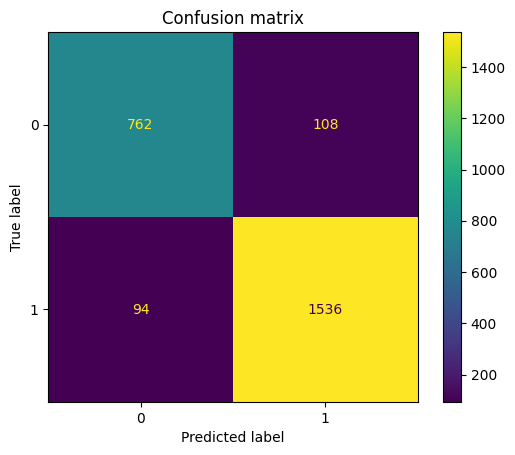

In [15]:
# 绘制混淆矩阵
disp.plot()
plt.title("Confusion matrix")
plt.savefig("Confusion_matrix")
plt.show()

In [16]:
# 准确率accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Accuracy of Label is ",accuracy_score(y_test,y_pred))

Accuracy of Label is  0.9192


In [17]:
# 精确度 P = TP / (TP + FP)
print("Precision of Label is ",precision_score(y_test,y_pred))

Precision of Label is  0.9343065693430657


In [18]:
# 召回率R = TP / (TP + FN)。此处填入你的代码。（6）
from sklearn.metrics import recall_score
r = recall_score(y_test, y_pred) # 返回一个浮点数，表示召回率
print(r) # 打印召回率


0.9423312883435583


In [19]:
# F1度量 F1 = (2 x P x R) / (P + R)
print("F1 of Label is",f1_score(y_test,y_pred))

F1 of Label is 0.9383017715332925


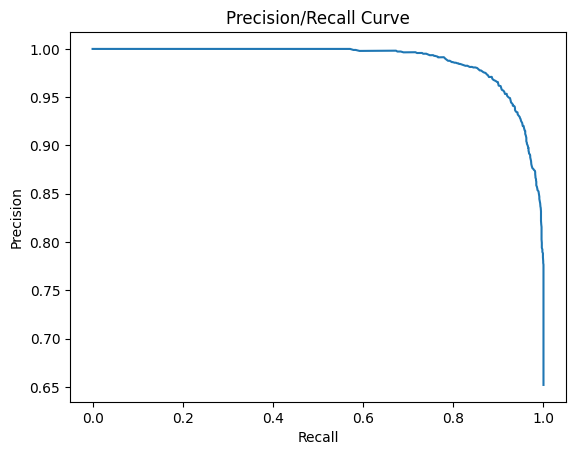

In [20]:
# 绘制P-R曲线
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall,precision)
plt.savefig("P_R_Curve")
plt.show()

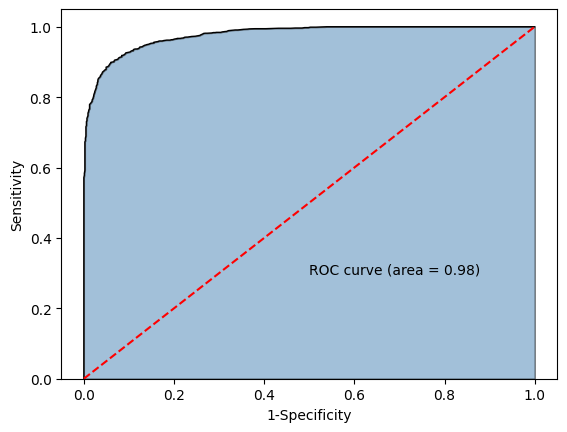

In [21]:
# 绘制ROC曲线
from sklearn import metrics
# 计算不同阈值下，fpr和tpr的组合值，其中fpr表示1-Specificity，tpr表示Sensitivity
fpr,tpr,threshold = metrics.roc_curve(y_test, y_scores)

# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)
# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()